## Abstract

Taylor Swift Song Top 10 Similarities Analysis Taylor Swift's musical style has evolved a lot since her 2006 debut album. In her 2023-2024 global concert tour, The Eras Tour, she guided fans through these musical "eras". The film version of The Eras Tour became the highest-grossing concert film in history in just one weekend when it was released in October 2023.

The datasets we will use contain all songs on each of Taylor Swift's first eleven studio albums. This data was collected before the recent release of her 12th album, The Life of a Showgirl, which came out on October 3, 2025.

We've chosen to use deluxe or extended versions of these albums when available, to include more songs, but we've eliminated duplicate versions of songs, such as acoustic versions and remixes. We've also chosen to include the rerecorded "Taylor's Version" when available. Our datasets don't include Taylor Swift songs that were released as part of movie soundtracks, live recordings, holiday specials, or through any other mechanism.

In [1]:
import babypandas as bpd
import numpy as np
from IPython.display import HTML, display, IFrame, YouTubeVideo, Markdown, clear_output
import ipywidgets as widgets

import matplotlib.pyplot as plt
plt.style.use('seaborn-colorblind')
plt.rcParams["figure.figsize"] = (10, 5)

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

import otter
import numbers
grader = otter.Notebook()

def play_spotify(uri):
    code = uri[uri.rfind(':')+1:]
    src = f"https://open.spotify.com/embed/track/{code}"
    width = 400
    height = 75
    display(IFrame(src, width, height))

<a id='outline'></a>

### Outline 

- [Welcome to `tswift`💃](#section0) 
- [Section 1: Data Visualization 👀](#section1)
- [Section 2:  Song Recommender 🎧](#section2)
- [Section 3: Lyric Searcher 🔍](#section3)
- [Section 4: Keywords 🔑](#section4)

<a id='section0'></a>
## Welcome to `tswift` 
<small>(<a href="#outline">return to the outline</a>)</small>

In this project, I will look at Taylor Swift's songs through the lens of data science. We have data on both the lyrics and audio qualities of Taylor Swift's musical body of work. 

The datasets I will use contain all songs on each of Taylor Swift's first [eleven studio albums](https://en.wikipedia.org/wiki/Taylor_Swift_albums_discography#Studio_albums). This data was collected before the recent release of her 12th album, *The Life of a Showgirl*, which came out on October 3, 2025. 

I'll work with two DataFrames throughout the project:
- The `lyrics` DataFrame contains the lyrics of each Taylor Swift song.  The data in `lyrics` comes from [Genius](https://genius.com/), "the world's biggest collection of song lyrics and crowdsourced musical knowledge."
- The `tswift` DataFrame contains information about the audio features of each song. The data in `tswift` comes from [Spotify](https://open.spotify.com/). 

Let's start by reading in these DataFrames and taking a look around. Run the cell below to load `lyrics`.

In [2]:
lyrics = bpd.read_csv('data/lyrics.csv')
lyrics

,Album,Song,Lyrics
0,The Tortured Poets Department,But Daddy I Love Him,I forget how the West was won\nI forget if thi...
1,The Tortured Poets Department,Cassandra,I was in my new house placing daydreams\nPatch...
2,The Tortured Poets Department,Chloe or Sam or Sophia or Marcus,Your hologram stumbled into my apartment\nHand...
3,The Tortured Poets Department,Clara Bow,"""You look like Clara Bow\nIn this light, remar..."
4,The Tortured Poets Department,Down Bad,Did you really beam me up\nIn a cloud of spark...
...,...,...,...
224,Taylor Swift,Stay Beautiful,"Cory's eyes are like a jungle\nHe smiles, it's..."
225,Taylor Swift,Teardrops On My Guitar,Drew looks at me\nI fake a smile so he won't s...
226,Taylor Swift,The Outside,I didn't know what I would find\nWhen I went l...
227,Taylor Swift,Tied Together With A Smile,Seems the only one who doesn't see your beauty...


In [3]:
# Set 'song' as index
lyrics = lyrics.set_index('Song')
lyrics

,Album,Lyrics
Song,,
But Daddy I Love Him,The Tortured Poets Department,I forget how the West was won\nI forget if thi...
Cassandra,The Tortured Poets Department,I was in my new house placing daydreams\nPatch...
Chloe or Sam or Sophia or Marcus,The Tortured Poets Department,Your hologram stumbled into my apartment\nHand...
Clara Bow,The Tortured Poets Department,"""You look like Clara Bow\nIn this light, remar..."
Down Bad,The Tortured Poets Department,Did you really beam me up\nIn a cloud of spark...
...,...,...
Stay Beautiful,Taylor Swift,"Cory's eyes are like a jungle\nHe smiles, it's..."
Teardrops On My Guitar,Taylor Swift,Drew looks at me\nI fake a smile so he won't s...
The Outside,Taylor Swift,I didn't know what I would find\nWhen I went l...


Let's look at the `tswift` DataFrame. Songs are ordered by `'Popularity'`.

In [4]:
tswift = bpd.read_csv('data/tswift.csv')
tswift

,URI,Album,Song Name,Popularity,Disc Number,Track Number,Explicit,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Time Signature
0,1BxfuPKGuaTgP7aM0Bbdwr,Lover,Cruel Summer,90,1,2,False,0.552,0.702,9,-5.707,1,0.1570,0.11700,0.000021,0.1050,0.564,169.994,178427,4
1,2OzhQlSqBEmt7hmkYxfT6m,The Tortured Poets Department,Fortnight (Ft. Post Malone),86,1,1,False,0.504,0.386,11,-10.976,1,0.0308,0.50200,0.000015,0.0961,0.281,192.004,228965,4
2,1dGr1c8CrMLDpV6mPbImSI,Lover,Lover,85,1,3,False,0.359,0.543,7,-7.582,1,0.0919,0.49200,0.000016,0.1180,0.453,68.534,221307,4
3,3hUxzQpSfdDqwM3ZTFQY0K,folklore,august,85,1,8,False,0.532,0.623,5,-9.208,1,0.0331,0.53800,0.000073,0.0925,0.403,89.937,261923,4
4,4R2kfaDFhslZEMJqAFNpdd,folklore,cardigan,84,1,2,False,0.613,0.581,0,-8.588,0,0.0424,0.53700,0.000345,0.2500,0.551,130.033,239560,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224,2ZoOmCSgj0ypVAmGd1ve4y,Taylor Swift,Stay Beautiful,50,1,8,False,0.594,0.629,8,-4.919,1,0.0246,0.08680,0.000000,0.1370,0.504,131.597,236053,4
225,6K0CJLVXqbGMeJSmJ4ENKK,Taylor Swift,Tied Together With A Smile,50,1,7,False,0.479,0.578,2,-4.963,1,0.0294,0.52500,0.000000,0.0841,0.192,146.165,248107,4
226,2QA3IixpRcKyOdG7XDzRgv,Taylor Swift,The Outside,49,1,6,False,0.589,0.805,5,-4.055,1,0.0293,0.00491,0.000000,0.2400,0.591,112.982,207107,4
227,5OOd01o2YS1QFwdpVLds3r,Taylor Swift,Invisible,49,1,13,False,0.612,0.394,7,-5.723,1,0.0243,0.63700,0.000000,0.1470,0.233,96.001,203227,4


We've used the [documentation](https://developer.spotify.com/documentation/web-api/reference/#/operations/get-several-audio-features) provided by Spotify to create the table below, which describes the columns present in `tswift` and what they represent. Note that many of these features (such as `'Valence'`) are defined and determined by Spotify. We have no way of knowing exactly how they determine the values of these audio features for each song, as their algorithms are proprietary.

| Variable Name | Data Type | Explanation |
| -------- | ------- | ------- |
| `'URI'`  | str | Unique identifier for the song in Spotify. |
| `'Album'`  | str | Album name. |
| `'Song Name'`  | str | Song name. |
| `'Disc Number'`  | int | Disc number, usually 1 unless the album contains more than 1 disc. |
| `'Track Number'`  | int | The number of the track on the specified disc. |
| `'Popularity'`  | int | 0 to 100 scale of the current popularity of the song. |
| `'Explicit'`  | bool | True if the song contains explicit words, False otherwise. |
| `'Danceability'`  | float | 0 to 1 scale of how suitable a track is for dancing. |
| `'Energy'`  | float | 0 to 1 scale of a track's activity and intensity. |
| `'Key'`  | int | The average key/pitch of a track, where 0 = C, 1 = C#/Db, 2 = D, and so on. |
| `'Loudness'`  | float | The average loudness of a track, measured on a relative scale in decibels. Values typically range between -60 (softer) and 0 (louder). |
| `'Mode'`  | int | Either 0 for a minor key, or 1 for a major key.|
| `'Speechiness'`  | float | 0 to 1 scale measuring the prevalence of spoken words. |
| `'Acousticness'`  | float | 0 to 1 scale measuring how likely a track is to be acoustic. |
| `'Instrumentalness'`  | float | 0 to 1 scale measuring how likely a track is to be instrumental (without vocals). |
| `'Liveness'`  | float | 0 to 1 scale measuring how likely a track is to have been recorded with a live audience.|
| `'Valence'`  | float | 0 to 1 scale of how positive or happy a track is. |
| `'Tempo'`  | float | The estimated number of beats per minute. |
| `'Duration_ms'`  | int | Length of song in milliseconds. |
| `'Time Signature'`  | int | The number of beats in each bar (or measure). |

One piece of information we'd like to have in `tswift`, which is currently missing, is the year in which each album was released. This variable would allow us to explore trends over time. The `albums` DataFrame contains the information we need.

In [5]:
albums = bpd.read_csv('data/albums.csv')
albums

,Album,Release Date
0,Taylor Swift,"October 24, 2006"
1,Fearless,"November 11, 2008"
2,Speak Now,"October 25, 2010"
3,Red,"October 22, 2012"
4,1989,"October 27, 2014"
...,...,...
6,Lover,"August 23, 2019"
7,folklore,"July 24, 2020"
8,evermore,"December 11, 2020"
9,Midnights,"October 21, 2022"


Add a column to `tswift` called `'Year'` that contains the year of each song's release, as an int, based on the data in `albums`. 

In [6]:
def extract_year_as_int(y):
    "convert string to int"
    year = y.split(' ')[2]
    return int(year)

albums_year = albums.assign(Year = albums.get('Release Date').apply(extract_year_as_int)).get(['Album', 'Year'])
tswift = tswift.merge(albums_year, on = 'Album')
tswift

,URI,Album,Song Name,Popularity,Disc Number,Track Number,Explicit,Danceability,Energy,Key,...,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Time Signature,Year
0,1BxfuPKGuaTgP7aM0Bbdwr,Lover,Cruel Summer,90,1,2,False,0.552,0.702,9,...,1,0.1570,0.11700,0.000021,0.1050,0.564,169.994,178427,4,2019
1,1dGr1c8CrMLDpV6mPbImSI,Lover,Lover,85,1,3,False,0.359,0.543,7,...,1,0.0919,0.49200,0.000016,0.1180,0.453,68.534,221307,4,2019
2,3RauEVgRgj1IuWdJ9fDs70,Lover,The Man,79,1,4,False,0.777,0.658,0,...,1,0.0540,0.07670,0.000000,0.0901,0.633,110.048,190360,4,2019
3,6RRNNciQGZEXnqk8SQ9yv5,Lover,You Need To Calm Down,77,1,14,False,0.771,0.671,2,...,1,0.0553,0.00929,0.000000,0.0637,0.714,85.026,171360,4,2019
4,1fzAuUVbzlhZ1lJAx9PtY6,Lover,Daylight,77,1,18,False,0.557,0.496,0,...,1,0.0563,0.80800,0.000173,0.0772,0.265,149.983,293453,4,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224,2ZoOmCSgj0ypVAmGd1ve4y,Taylor Swift,Stay Beautiful,50,1,8,False,0.594,0.629,8,...,1,0.0246,0.08680,0.000000,0.1370,0.504,131.597,236053,4,2006
225,6K0CJLVXqbGMeJSmJ4ENKK,Taylor Swift,Tied Together With A Smile,50,1,7,False,0.479,0.578,2,...,1,0.0294,0.52500,0.000000,0.0841,0.192,146.165,248107,4,2006
226,2QA3IixpRcKyOdG7XDzRgv,Taylor Swift,The Outside,49,1,6,False,0.589,0.805,5,...,1,0.0293,0.00491,0.000000,0.2400,0.591,112.982,207107,4,2006
227,5OOd01o2YS1QFwdpVLds3r,Taylor Swift,Invisible,49,1,13,False,0.612,0.394,7,...,1,0.0243,0.63700,0.000000,0.1470,0.233,96.001,203227,4,2006


Set its index to 'URI', since we were told in the data description table that 'URI's are unique.

In [7]:
tswift = tswift.set_index('URI')
tswift

,Album,Song Name,Popularity,Disc Number,Track Number,Explicit,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Time Signature,Year
URI,,,,,,,,,,,,,,,,,,,,
1BxfuPKGuaTgP7aM0Bbdwr,Lover,Cruel Summer,90,1,2,False,0.552,0.702,9,-5.707,1,0.1570,0.11700,0.000021,0.1050,0.564,169.994,178427,4,2019
1dGr1c8CrMLDpV6mPbImSI,Lover,Lover,85,1,3,False,0.359,0.543,7,-7.582,1,0.0919,0.49200,0.000016,0.1180,0.453,68.534,221307,4,2019
3RauEVgRgj1IuWdJ9fDs70,Lover,The Man,79,1,4,False,0.777,0.658,0,-5.191,1,0.0540,0.07670,0.000000,0.0901,0.633,110.048,190360,4,2019
6RRNNciQGZEXnqk8SQ9yv5,Lover,You Need To Calm Down,77,1,14,False,0.771,0.671,2,-5.617,1,0.0553,0.00929,0.000000,0.0637,0.714,85.026,171360,4,2019
1fzAuUVbzlhZ1lJAx9PtY6,Lover,Daylight,77,1,18,False,0.557,0.496,0,-9.602,1,0.0563,0.80800,0.000173,0.0772,0.265,149.983,293453,4,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2ZoOmCSgj0ypVAmGd1ve4y,Taylor Swift,Stay Beautiful,50,1,8,False,0.594,0.629,8,-4.919,1,0.0246,0.08680,0.000000,0.1370,0.504,131.597,236053,4,2006
6K0CJLVXqbGMeJSmJ4ENKK,Taylor Swift,Tied Together With A Smile,50,1,7,False,0.479,0.578,2,-4.963,1,0.0294,0.52500,0.000000,0.0841,0.192,146.165,248107,4,2006
2QA3IixpRcKyOdG7XDzRgv,Taylor Swift,The Outside,49,1,6,False,0.589,0.805,5,-4.055,1,0.0293,0.00491,0.000000,0.2400,0.591,112.982,207107,4,2006


<a id='section1'></a>
## Section 1: Data Visualization 👀 

<small>(<a href="#outline">return to the outline</a>)</small>

We'll use the `tswift` DataFrame to create visualizations that will help us answer questions about Taylor Swift's music, including:
- How many songs did Taylor Swift release each year?
- How do different audio features such as `'Loudness'` and `'Energy'` relate to one another?
- Are Taylor Swift's songs generally more positive or more negative?
- Which Taylor Swift album has the most songs in a minor key?

Create a density histogram showing the distribution of `'Year'` in the `tswift` DataFrame.

<AxesSubplot:title={'center':'Distribution of Each Year'}, ylabel='Frequency'>

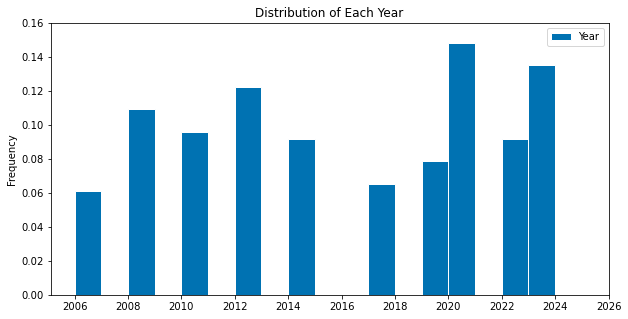

In [8]:
tswift.plot(
    kind = 'hist',
    y = 'Year',
    density = True,
    ec = 'w',
    xticks = np.arange(2006, 2027, 2),
    yticks = np.arange(0.0, 0.17, 0.02),
    bins = np.arange(2006, 2025, 1),
    title = 'Distribution of Each Year'
)

Taylor Swift sometimes released two albums, called sister albums 👯. Find out which two albums were released that year.

In [9]:
albums_year = albums.assign(Year = albums.get('Release Date').apply(extract_year_as_int)).get(['Album', 'Year'])
albums_year = albums_year.groupby('Year').count().sort_values('Album').index[-1]
sister_albums = tswift[tswift.get('Year')== albums_year].groupby('Album').count().reset_index().get('Album').unique()
print(f'Sister albums: {sister_albums}')

Sister albums: ['evermore' 'folklore']


> Which album has the most songs?

In [10]:
most_songs_album =  tswift.groupby('Album').count().sort_values('Year', ascending = False).index[0]
print(f"{most_songs_album} has the most songs.")

The Tortured Poets Department has the most songs.


> What are the most and least popular Taylor Swift songs right now?

In [11]:
tswifts = tswift.reset_index().set_index('Song Name')
most_pop = tswifts.sort_values('Popularity').index[-1]
least_pop = tswifts.sort_values('Popularity').index[0]

print(f'The most popular Taylor Swift song right now is {most_pop}.')
print(f'The least popular Taylor Swift song right now is {least_pop}.')

The most popular Taylor Swift song right now is Cruel Summer.
The least popular Taylor Swift song right now is A Perfectly Good Heart.


Create a DataFrame to create an overlaid line plot showing how the `'Max_Popularity'` and `'Median_Popularity'` are related to `'Year'`.

In [12]:
popularity_max = tswift.reset_index().get(['Year', 'Popularity']).groupby('Year').max()
popularity_median = tswift.reset_index().get(['Year', 'Popularity']).groupby('Year').median()
popularity_by_year = popularity_max.assign(Max_Popularity = popularity_max.get('Popularity'),
                                          Median_Popularity = popularity_median.get('Popularity'))
popularity_by_year = popularity_by_year.get(['Max_Popularity', 'Median_Popularity'])
popularity_by_year

,Max_Popularity,Median_Popularity
Year,,
2006,68,52.0
2008,79,61.0
2010,77,66.0
2012,79,66.0
2014,76,68.0
2017,83,74.0
2019,90,73.0
2020,85,65.0
2022,82,69.0


<AxesSubplot:title={'center':'Max and Median Popularity of Each Year'}, xlabel='Year'>

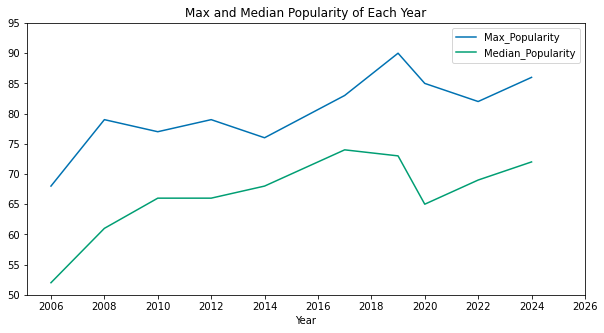

In [13]:
popularity_by_year.plot(
    kind = 'line',
    y = ['Max_Popularity', 'Median_Popularity'],
    xticks = np.arange(2006, 2027, 2),
    yticks = np.arange(50, 100, 5),
    title = 'Max and Median Popularity of Each Year'
)

Relationship between `'Loudness'` (on the horizontal axis) and `'Energy'` 

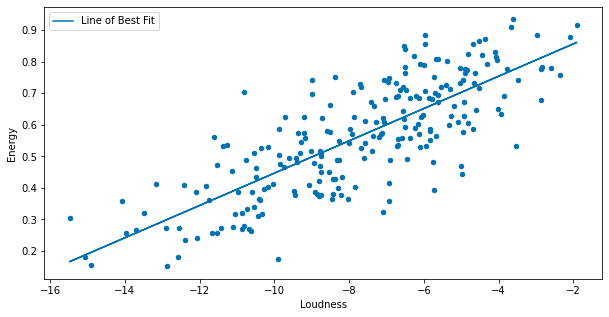

In [14]:
tswift.plot(
    kind='scatter',
    x = 'Loudness',
    y = 'Energy'
          )
# The code below plots the line of best fit; do not alter it!
x = tswift.get('Loudness')
y = tswift.get('Energy')
a, b = np.polyfit(x, y, 1)
plt.plot(x, a * x + b, label='Line of Best Fit')        
plt.legend()

Louder songs tend to be higher in energy.

Another one of Spotify's audio features is `'Valence'`, which measures the positivity, or "happiness", of a track on a 0 to 1 scale. Larger values correspond to more positive songs. 

Relationship between `'Valence'` and `'Popularity'`.

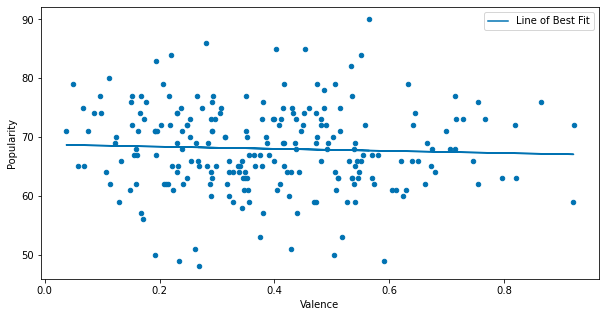

In [15]:
valencePopularity = tswift.reset_index()
valencePopularity.plot(kind='scatter', x = 'Valence', y='Popularity')
x = tswift.get('Valence')
y = tswift.get('Popularity')
a, b = np.polyfit(x, y, 1)
plt.plot(x, a * x + b, label='Line of Best Fit')        
plt.legend()
plt.show()

There is no clear relationship between `'Valence'` and `'Popularity'`.



Visualizes the distribution of `'Valence'`  for all of Taylor Swift's songs.

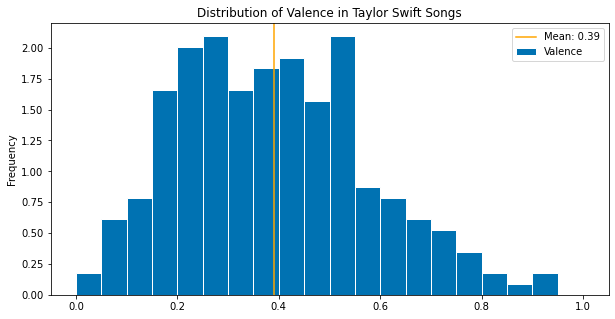

In [16]:
mean_valence = valencePopularity.get('Valence').mean()
valencePopularity.plot(kind='hist', y = 'Valence', title = 'Distribution of Valence in Taylor Swift Songs', density = True, ec = 'w', bins = np.arange(0, 1.05, 0.05))
plt.axvline(mean_valence, color='orange', label=f'Mean: {mean_valence:.2f}')
plt.legend()

Taylor Swift's songs are more negative on average.

Create a plot that shows the number of songs in a minor key on each album, only among albums with at least two songs in a minor key. 

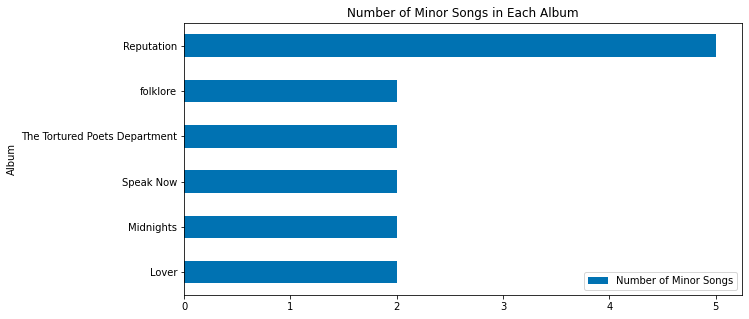

In [17]:
tswift_minor = tswift[tswift.get('Mode') == 0].reset_index().groupby('Album').count()
tswift_minor = tswift_minor[tswift_minor.get('Key') >= 2].get(['Mode']).sort_values('Mode')
tswift_minor.plot(
    kind='barh',
    title = 'Number of Minor Songs in Each Album'
)
plt.legend(['Number of Minor Songs'])

Since we only have audio features for songs, not albums, we'll calculate the values of an audio feature for an album by averaging the values of that audio feature across all songs on the album. 

In [18]:
def sort_albums_by(feature):
    energy_mean = tswift.groupby('Album').mean().reset_index()
    energy_mean_sort = energy_mean.sort_values(feature).get('Album')  
    return np.array(energy_mean_sort)

features = ['Popularity', 'Explicit', 'Danceability', 'Energy', 'Loudness',
            'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness',
            'Valence', 'Duration_ms', 'Tempo']

for feature in features:
    display(Markdown(f"Taylor Swift albums, in descending order of `'{feature}'`:"))
    display(Markdown("- " + ", ".join(sort_albums_by(feature))))

Taylor Swift albums, in descending order of `'Popularity'`:

- Taylor Swift, Fearless, evermore, Red, Speak Now, Midnights, 1989, folklore, The Tortured Poets Department, Reputation, Lover

Taylor Swift albums, in descending order of `'Explicit'`:

- 1989, Fearless, Lover, Reputation, Speak Now, Taylor Swift, Red, folklore, Midnights, evermore, The Tortured Poets Department

Taylor Swift albums, in descending order of `'Danceability'`:

- evermore, The Tortured Poets Department, Fearless, Speak Now, Taylor Swift, folklore, Red, Midnights, 1989, Reputation, Lover

Taylor Swift albums, in descending order of `'Energy'`:

- folklore, The Tortured Poets Department, Midnights, evermore, Lover, Reputation, Red, Fearless, Speak Now, Taylor Swift, 1989

Taylor Swift albums, in descending order of `'Loudness'`:

- Midnights, folklore, evermore, The Tortured Poets Department, Lover, Reputation, 1989, Red, Fearless, Taylor Swift, Speak Now

Taylor Swift albums, in descending order of `'Speechiness'`:

- Taylor Swift, Fearless, Speak Now, folklore, Red, 1989, The Tortured Poets Department, evermore, Reputation, Midnights, Lover

Taylor Swift albums, in descending order of `'Acousticness'`:

- 1989, Reputation, Red, Speak Now, Fearless, Taylor Swift, Lover, Midnights, The Tortured Poets Department, folklore, evermore

Taylor Swift albums, in descending order of `'Instrumentalness'`:

- Speak Now, Fearless, Reputation, Taylor Swift, Red, The Tortured Poets Department, folklore, Lover, 1989, evermore, Midnights

Taylor Swift albums, in descending order of `'Liveness'`:

- folklore, evermore, Lover, Red, Speak Now, Midnights, The Tortured Poets Department, 1989, Reputation, Fearless, Taylor Swift

Taylor Swift albums, in descending order of `'Valence'`:

- Midnights, Reputation, The Tortured Poets Department, folklore, Speak Now, 1989, Taylor Swift, Fearless, evermore, Red, Lover

Taylor Swift albums, in descending order of `'Duration_ms'`:

- Lover, Midnights, Taylor Swift, 1989, Reputation, folklore, The Tortured Poets Department, evermore, Fearless, Red, Speak Now

Taylor Swift albums, in descending order of `'Tempo'`:

- Midnights, Red, folklore, Lover, 1989, evermore, Taylor Swift, The Tortured Poets Department, Reputation, Speak Now, Fearless

While Taylor Swift is primarily a solo artist, she has collaborated with other artists on a number of songs.

In [19]:
tswift_collab = tswift.assign(Collaborate = tswift.get('Song Name').str.contains('Ft.', case=False, na=False))
features = ['Explicit', 'Danceability', 'Acousticness']
collab_means = tswift_collab.groupby('Collaborate').mean().get(features)
collab_means

,Explicit,Danceability,Acousticness
Collaborate,,,
False,0.135922,0.584748,0.331798
True,0.130435,0.542696,0.433598


Text(0.5, 0, 'Average Value')

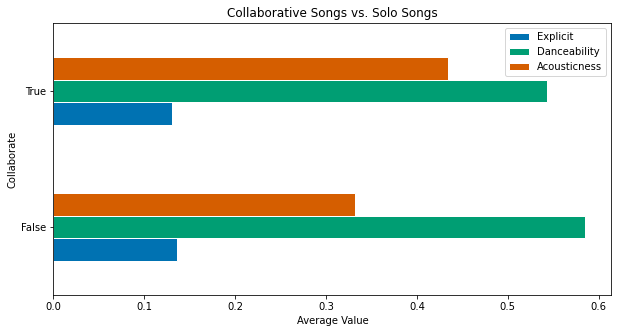

In [20]:
collab_means.plot(kind = 'barh', ec = 'w', title = 'Collaborative Songs vs. Solo Songs')
plt.xlabel("Average Value")

Collaborative songs have a higher value of `'Acousticness'` than solo songs, on average.

<a id='section2'></a>
## Section 2: Song Recommender 🎧

> Your favorite song was playing from the far side of the gym.

<small>(<a href="#outline">return to the outline</a>)</small>

In this section, we'll create a Taylor Swift song recommender tool. The tool will allow you to input a song you like, selected from a collection of popular songs  on Spotify, and it will recommend to you the songs in Taylor Swift's body of work that are most similar to your input song.

We will also use a separate dataset of allowed input songs. For this, we have a [collection of popular songs with more than one billion streams](https://open.spotify.com/playlist/37i9dQZF1DX7iB3RCnBnN4) on Spotify. 

In [21]:
billions_club = bpd.read_csv('data/billions_club.csv').set_index('URI')
billions_club

,Album,Song Name,Artist,Disc Number,Track Number,Popularity,Explicit,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Time Signature
URI,,,,,,,,,,,,,,,,,,,,
02dRkCEc8Q5ch4TTcnLxOn,Late Night Feelings,Nothing Breaks Like a Heart (feat. Miley Cyrus),Mark Ronson; Miley Cyrus,1,9,76,False,0.601,0.794,7,-5.844,0,0.0671,0.00987,0.000001,0.4180,0.244,114.066,217099,4
4kV4N9D1iKVxx1KLvtTpjS,"thank u, next","break up with your girlfriend, i'm bored",Ariana Grande,1,12,73,True,0.727,0.554,5,-5.290,0,0.0915,0.04210,0.000000,0.1060,0.335,170.000,190440,4
07nH4ifBxUB4lZcsf44Brn,Motion,Blame (feat. John Newman),Calvin Harris; John Newman,1,3,80,False,0.414,0.857,0,-4.078,0,0.0808,0.02870,0.005740,0.3430,0.348,128.024,212960,4
6dOtVTDdiauQNBQEDOtlAB,HIT ME HARD AND SOFT,BIRDS OF A FEATHER,Billie Eilish,1,4,98,False,0.747,0.507,2,-10.171,1,0.0358,0.20000,0.060800,0.1170,0.438,104.978,210373,4
76JKIsdKrAfWUMjaA0u7v5,Unreal Unearth: Unaired,Too Sweet,Hozier,2,1,78,False,0.741,0.620,10,-5.505,1,0.0412,0.02950,0.000809,0.0398,0.934,117.038,251424,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0h1W19pS59KtEd7aDzF58i,Scorpion,In My Feelings,Drake,2,9,47,False,0.833,0.619,8,-5.822,1,0.0971,0.04960,0.000087,0.3000,0.366,91.022,217925,4
2b8fOow8UzyDFAE27YhOZM,Memories,Memories,Maroon 5,1,1,25,False,0.764,0.320,11,-7.209,1,0.0546,0.83700,0.000000,0.0822,0.575,91.019,189486,4
116H0KvKr2Zl4RPuVBruDO,MIA (feat. Drake),MIA (feat. Drake),Bad Bunny; Drake,1,1,12,False,0.817,0.539,6,-6.349,0,0.0621,0.01410,0.000496,0.0990,0.158,97.062,210368,4


We will allow our recommender tool to base its recommendations on a customizable set of audio features. When not specified, the tool will use *all* of the audio features that are measured on a 0 to 1 scale.

In [22]:
default_features = [
    'Danceability', 
    'Energy',
    'Speechiness',
    'Acousticness',
    'Instrumentalness',
    'Liveness',
    'Valence'
]

Building our recommender tool!

In [23]:
def get_feature_values(input_uri, song_df, feature_list):
    song_df = song_df.reset_index()
    if 'URI' not in song_df.columns or input_uri not in song_df.get('URI').values:
        print('This URI was not found.')
        return None
    
    indx = song_df[song_df.get('URI') == input_uri].index[0]
    features = np.array(song_df.get(feature_list).loc[indx]) 
    return features

def calculate_similarity(features_1, features_2):
    f1 = np.array(features_1)
    f2 = np.array(features_2)
    return np.sqrt(sum((f1-f2)**2))

def calculate_similarity_for_all(input_uri, song_df, feature_list):
    similarity_scores = []
    input_feature = get_feature_values(input_uri, song_df, feature_list)
    indx = 0
    for indx in tswift.index:
        curr_feature = np.array(tswift.get(feature_list).loc[indx])
        score = calculate_similarity(curr_feature, input_feature)
        similarity_scores = np.append(similarity_scores, score)
    return np.array(similarity_scores)

def select_top_recommendations(similarity_scores, n):
    song_df_sort = tswift.assign(similarity_score = similarity_scores)
    song_df_sorts = song_df_sort.sort_values('similarity_score')
    song_sort = song_df_sorts.take(np.arange(n)).drop(columns = 'similarity_score')
    return song_sort

def song_recommender(input_uri, song_df, n, feature_list=default_features):
    return select_top_recommendations(calculate_similarity_for_all(input_uri, song_df, feature_list), n).get(['Album', 'Song Name'] + feature_list)

In [24]:
default = 'Bank Account by 21 Savage'

def get_and_format_recommendations(song_name):
    song, artist = song_name.split(' by ')
    row = billions_club[(billions_club.get('Song Name') == song) & (billions_club.get('Artist') == artist)]
    uri = row.index[0]
    recommendations_df = song_recommender(uri, billions_club, 5, default_features)
    display(HTML(f'<h3>The song you chose was {billions_club.get("Song Name").loc[uri]} by {billions_club.get("Artist").loc[uri]}.</h3>'))
    play_spotify(uri)
    display(HTML('<h4>Here are the 5 most similar Taylor Swift songs we found.</h4>'))
    for recommended_uri in recommendations_df.index:
        play_spotify(recommended_uri)

song_options = np.sort(billions_club.get('Song Name') + ' by ' + billions_club.get('Artist'))
song_widget = widgets.Dropdown(options=song_options, description='Song', layout={'width': '525px'}, value=default)
   
def change_rec(change):
    if change['name'] == 'value' and change['new'] != change['old']:
        clear_output()
        display(song_widget)
        get_and_format_recommendations(song_widget.value)

display(song_widget)
get_and_format_recommendations(default)
song_widget.observe(change_rec)

Dropdown(description='Song', index=49, layout=Layout(width='525px'), options=('1-800-273-8255 by Logic; Alessi…

<a id='section3'></a>
## Section 3: Lyric Searcher 🔍

> Dark side, I search for your dark side.

<small>(<a href="#outline">return to the outline</a>)</small>

In this section, we'll create a Taylor Swift lyric searcher similar to [this online tool](https://shaynak.github.io/taylor-swift/) created by Shayna Kothari, a software engineer at Facebook. Run the next cell and try inputting some search terms to explore what it does!

In [25]:
display(IFrame(src="https://shaynak.github.io/taylor-swift", width=800, height=600))

Building our own lyric searcher!

In [26]:
lyrics

,Album,Lyrics
Song,,
But Daddy I Love Him,The Tortured Poets Department,I forget how the West was won\nI forget if thi...
Cassandra,The Tortured Poets Department,I was in my new house placing daydreams\nPatch...
Chloe or Sam or Sophia or Marcus,The Tortured Poets Department,Your hologram stumbled into my apartment\nHand...
Clara Bow,The Tortured Poets Department,"""You look like Clara Bow\nIn this light, remar..."
Down Bad,The Tortured Poets Department,Did you really beam me up\nIn a cloud of spark...
...,...,...
Stay Beautiful,Taylor Swift,"Cory's eyes are like a jungle\nHe smiles, it's..."
Teardrops On My Guitar,Taylor Swift,Drew looks at me\nI fake a smile so he won't s...
The Outside,Taylor Swift,I didn't know what I would find\nWhen I went l...


In [27]:
def phrase_match_df(phrase):
    phrase_lower = phrase.lower()
    contain = lyrics.get('Lyrics').str.lower().str.contains(phrase_lower)
    return lyrics[contain]

def isolate_phrase(song_title, phrase):
    song_lyric = lyrics.get('Lyrics').loc[song_title]
    lines = song_lyric.split('\n')
    match_line = []
    pharse_lower = phrase.lower()
    for line in lines:
        if pharse_lower in line.lower() and line not in match_line:
            match_line = np.append(match_line , line)  
    return  match_line 

def surround_phrase(song_title, phrase):
    song_lyric = lyrics.get('Lyrics').loc[song_title]
    lines = song_lyric.split('\n')
    match_line = []
    phrase_lower = phrase.lower()
    added = []
    if len(lines) > 0 and phrase_lower in lines[0].lower():
        if 0 not in added:
            match_line = np.append(match_line , lines[0])
            added = np.append(added, 0)
        if len(lines) > 1 and 1 not in added:
            match_line = np.append(match_line , lines[1])
            added = np.append(added, 1)
    
    for i in range(1, len(lines)-1):
        if phrase_lower in lines[i].lower():
            if i-1 not in added:
                match_line = np.append(match_line , lines[i-1])
                added = np.append(added, i-1)
            if i not in added:
                match_line = np.append(match_line , lines[i])
                added = np.append(added, i)
            if i+1 not in added:
                match_line = np.append(match_line , lines[i+1])
                added = np.append(added, i+1)
    
    if len(lines) > 1 and phrase_lower in lines[-1].lower(): 
        if len(lines)-2 not in added:
            match_line = np.append(match_line , lines[-2])
            added = np.append(added, len(lines)-2)
        if len(lines)-1 not in added:
            match_line = np.append(match_line , lines[-1])
            added = np.append(added, len(lines)-1)
    return match_line

def one_song_search(song_title, phrase):
    song_lyric = lyrics.get('Lyrics').loc[song_title]
    album_name = lyrics.get('Album').loc[song_title]
    lines = song_lyric.split('\n')
    match_line = []
    phrase_lower = phrase.lower()
    added = []
    if len(lines) > 0 and phrase_lower in lines[0].lower():
         
        if 0 not in added:
            match_line = np.append(match_line , lines[0])
            added = np.append(added, 0)
        if len(lines) > 1 and 1 not in added:
            match_line = np.append(match_line , lines[1])
            added = np.append(added, 1)
        match_line = np.append(match_line , f'{song_title}, {album_name}')
    
    for i in range(1, len(lines)-1):
        if phrase_lower in lines[i].lower():
            if i-1 not in added:
                match_line = np.append(match_line , lines[i-1])
                added = np.append(added, i-1)
            if i not in added:
                match_line = np.append(match_line , lines[i])
                added = np.append(added, i)
            if i+1 not in added:
                match_line = np.append(match_line , lines[i+1])
                added = np.append(added, i+1)
            match_line = np.append(match_line , f'{song_title}, {album_name}')
    
    if len(lines) > 1 and phrase_lower in lines[-1].lower():
         
        if len(lines)-2 not in added:
            match_line = np.append(match_line , lines[-2])
            added = np.append(added, len(lines)-2)
        if len(lines)-1 not in added:
            match_line = np.append(match_line , lines[-1])
            added = np.append(added, len(lines)-1)
        match_line = np.append(match_line , f'{song_title}, {album_name}')
    return match_line

def search_for(phrase):
    match_song = phrase_match_df(phrase)
    match_array = np.array([])
    for song_title in match_song.index:
        songs = one_song_search(song_title, phrase)
        match_array = np.append(match_array, songs)
    return match_array

In [28]:
def search_and_display(phrase, to_display=True):
    match_array = search_for(phrase)  
    matching_songs = np.array([])
        
    for line in match_array:
        if line in np.array(lyrics.reset_index().get('Song') + ", " + lyrics.reset_index().get('Album')):
            if to_display:
                display(HTML(f'<center><b><i>{line}</i></b></center>')) # Display song and album names in bold italics.
                display(Markdown('___'))          
            matching_songs = np.append(matching_songs, ', '.join(line.split(', ')[:-1]))  
        elif len(line) > 0:
            if to_display:
                display(HTML(f'<center>{line}</center>'))

    matching_songs = np.unique(matching_songs) 
    num_songs = len(matching_songs)
    num_usages = 0
    
    for song in matching_songs:   
        num_usages = num_usages+1
            
    output_list = [num_usages, num_songs]
    
    if to_display:
        display(HTML('<h3><center><span style="color:#888">Found ' + str(output_list[0]) + ' usages of \"' + phrase + '\" across ' + str(output_list[1]) + ' songs.</span></center></h3>'))
    return output_list 

In [29]:
default_lyric = 'love you'

lyric_box = widgets.Text(
    value=default_lyric,
    placeholder='Type a phrase here and hit enter.',
    description='Phrase:',
    layout={'width': '525px'},
    disabled=False   
)

def change_matches(change):
    clear_output()
    display(lyric_box)
    search_and_display(lyric_box.value)

display(lyric_box)
search_and_display(default_lyric)
lyric_box.on_submit(change_matches)

Text(value='love you', description='Phrase:', layout=Layout(width='525px'), placeholder='Type a phrase here an…

___

___

___

___

___

___

___

___

___

___

___

___

___

___

___

___

___

___

___

___

___

___

___

___

___

___

___

___

___

___

___

___

___

___

___

___

___

___

___

___

___

___

___

___

___

___

<a id='section4'></a>
## Section 4: Keywords 🔑

> I didn't know you were keeping count, but, oh, you were keeping count.

<small>(<a href="#outline">return to the outline</a>)</small>

In this section, I will identify keywords that summarize each song in Taylor Swift's album `'Lover'` 💕.

In [30]:
lover_df = lyrics[lyrics.get('Album')=='Lover']
lover_df

,Album,Lyrics
Song,,
Afterglow,Lover,"I blew things out of proportion, now you're bl..."
Cornelia Street,Lover,We were in the backseat\nDrunk on something st...
Cruel Summer,Lover,"(Yeah, yeah, yeah, yeah)\n\nFever dream high i..."
Daylight,Lover,My love was as cruel as the cities I lived in\...
Death By A Thousand Cuts,Lover,"My, my, my, my\nMy, my, my, my\nMy, my, my, my..."
...,...,...
Paper Rings,Lover,The moon is high\nLike your friends were the n...
Soon You'll Get Better (Ft. The Chicks),Lover,The buttons of my coat were tangled in my hair...
The Archer,Lover,"Combat, I'm ready for combat\nI say I don't wa..."


In [31]:
def drop_punctuation(word):
    word = word.strip('\"\'')
    word = word.replace('"',"'")
    punctuation_dele = '()?.,;-_\\'
    for char in punctuation_dele:
        word = word.replace(char, '')
    return word

I will calculate the highest TF-IDFs of the words to get best summarize a song.

DataFrame named `counts_df` that has a row for each word in the `'Lover'` album and a column for each song on the album.  Each entry counts the number of instances of a word in a song. 

In [32]:
counts_df = bpd.read_csv('data/word_counts.csv').set_index('word')
counts_df

,Afterglow,Cornelia Street,Cruel Summer,Daylight,Death By A Thousand Cuts,False God,I Forgot That You Existed,I Think He Knows,It's Nice To Have A Friend,London Boy,Lover,ME! (Ft. Brendon Urie of Panic! At The Disco),Miss Americana & The Heartbreak Prince,Paper Rings,Soon You'll Get Better (Ft. The Chicks),The Archer,The Man,You Need To Calm Down
word,,,,,,,,,,,,,,,,,,
16th,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0
17,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
a,1,3,11,3,14,7,2,3,8,14,4,11,9,3,2,2,15,5
about,0,0,0,0,0,2,0,0,0,0,1,1,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
you'll,0,0,1,0,0,0,0,0,0,0,1,5,0,0,12,0,0,0
you're,2,0,4,0,3,4,0,0,0,0,5,5,0,14,0,0,2,6
you've,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [33]:
unique_words_raw =  np.unique(lover_df.get('Lyrics').str.lower().str.split().sum())
unique_words = np.unique([drop_punctuation(word) for word in unique_words_raw])
unique_words 

array(['16th', '17', '7', ..., "you've", 'your', 'yours'], dtype='<U14')

In [34]:
idf_array = np.array([])
word_array = unique_words 
song_columns = [col for col in counts_df.columns if col != 'word']
total_songs = len(song_columns)
# Loop through each word and compute the IDF of that word.
for word in word_array:
    counts_dfs = counts_df.reset_index()
    word_row = counts_dfs[counts_dfs.get('word') == word]
    songs_with_word = (word_row.get(song_columns).iloc[0] > 0).sum()
    idf = np.log(total_songs / songs_with_word)
    idf_array = np.append(idf_array, idf)

In [35]:
# Create a new empty DataFrame to store TF-IDF values.
every_tfidf = bpd.DataFrame()
songs_array = np.array(counts_df.columns)

for song in songs_array:
    tf_numerators = counts_df.get(song)
    tf_denominator = counts_df.get(song).apply(float).sum()
    tfs = tf_numerators/tf_denominator
    tfidfs = tfs*idf_array 
    every_tfidf = every_tfidf.assign(**{song: tfidfs})
    
every_tfidf

,Afterglow,Cornelia Street,Cruel Summer,Daylight,Death By A Thousand Cuts,False God,I Forgot That You Existed,I Think He Knows,It's Nice To Have A Friend,London Boy,Lover,ME! (Ft. Brendon Urie of Panic! At The Disco),Miss Americana & The Heartbreak Prince,Paper Rings,Soon You'll Get Better (Ft. The Chicks),The Archer,The Man,You Need To Calm Down
word,,,,,,,,,,,,,,,,,,
16th,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.028268,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
17,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.007067,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.008029
a,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
about,0.000000,0.000000,0.000000,0.000000,0.000000,0.006278,0.000000,0.000000,0.000000,0.000000,0.004069,0.002210,0.0,0.000000,0.004342,0.000000,0.002328,0.003052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
you'll,0.000000,0.000000,0.003120,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005571,0.015132,0.0,0.000000,0.071340,0.000000,0.000000,0.000000
you're,0.003381,0.000000,0.005752,0.000000,0.004560,0.007922,0.000000,0.000000,0.000000,0.000000,0.012836,0.006973,0.0,0.018953,0.000000,0.000000,0.002937,0.011552
you've,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.017624,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000


Function `'ten_keywords'` takes in the name of a song on the `'Lover'` album and returns an array of the 10 words with the highest TF-IDF values.

In [36]:
def ten_keywords(song_name):
    return np.array(every_tfidf.reset_index().get(['word', song_name]).sort_values(by=song_name, ascending=False).take(np.arange(10)).get('word'))

Dropdown(description='Song', index=7, layout=Layout(width='525px'), options=('Afterglow', 'Cornelia Street', '…

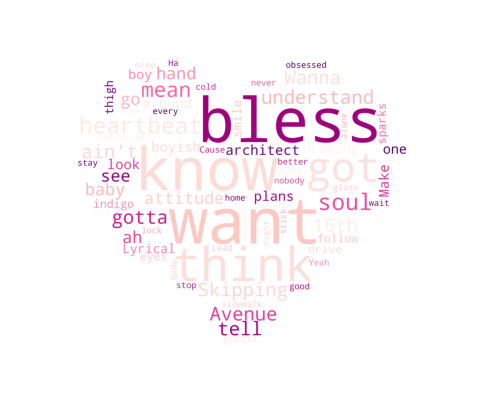

In [38]:
from wordcloud import WordCloud
from PIL import Image
# This function creates a word cloud for a given song.
def generate_lyrics_wordcloud(song_name):
    cloud = WordCloud(scale=3,
                      max_words=150,
                      colormap='RdPu',
                      mask=np.array(Image.open('data/images/heart.jpeg')),
                      background_color='white',
                      collocations=False).generate(lover_df.get('Lyrics').loc[song_name])
    plt.figure(figsize=(7, 5), dpi=100)
    plt.imshow(cloud)
    plt.axis('off')
    plt.show()


song_options_lover = np.array(lover_df.index)
song_widget_lover = widgets.Dropdown(options=song_options_lover, description='Song', layout={'width': '525px'}, value=default_lover)

def change_rec_lover(change):
    if change['name'] == 'value' and change['new'] != change['old']:
        clear_output()
        display(song_widget_lover)
        display(HTML('Note: It may take a few seconds for the updated word cloud to appear.'))
        generate_lyrics_wordcloud(song_widget_lover.value)

display(song_widget_lover)
song_widget_lover.observe(change_rec_lover)

## References
- Shayna Kothari, [Taylor Swift Lyric Searcher](https://shaynak.github.io/taylor-swift/) and [source code](https://github.com/shaynak/taylor-swift) 
- Tia Plagata, [How to Create Beautiful Word Clouds in Python](https://towardsdatascience.com/how-to-create-beautiful-word-clouds-in-python-cfcf85141214)
- Melanie Walsh, [Introduction to Cultural Analytics & Python](https://melaniewalsh.github.io/Intro-Cultural-Analytics/welcome.html)
- Cameron Watts, [Extracting Song Data From the Spotify API Using Python](https://towardsdatascience.com/extracting-song-data-from-the-spotify-api-using-python-b1e79388d50)
- Alice Zhao, A Dash of Data, [A Data Scientist Breaks Down All 10 Taylor Swift Albums (The Extended Version)](https://adashofdata.com/2023/03/01/a-data-scientist-breaks-down-all-10-taylor-swift-albums-the-extended-version/) and [source code](https://github.com/adashofdata/taylor_swift_data)
- Lyrics data from [Genius API](https://genius.com/)
- Musical data from [Spotify API](https://developer.spotify.com/)